In [53]:
import matplotlib.pyplot as plt
import json
import os
import numpy as np
from matplotlib.pyplot import figure
import glob

# Chinese massive

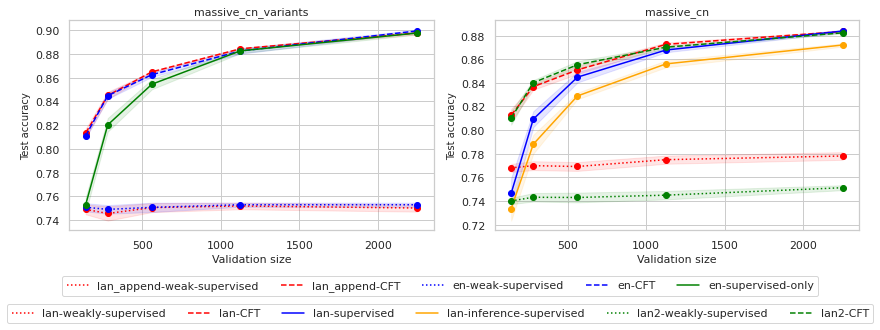

In [74]:
import matplotlib.pyplot as plt
import json
import numpy as np

# Dataset metadata
dataset_metadata = {
    'massive_en': {"train_size": 12021, "val_size": 2250, 'metric': 'acc'},
    'massive_cn': {"train_size": 12021, "val_size": 2250, 'metric': 'acc'},
    'massive_cn2': {"train_size": 12021, "val_size": 2250, 'metric': 'acc'},
    'massive_nb': {"train_size": 12021, "val_size": 2250, 'metric': 'acc'},
    'massive_nb2': {"train_size": 12021, "val_size": 2250, 'metric': 'acc'},
    'massive_ja2': {"train_size": 12021, "val_size": 2250, 'metric': 'acc'},
    'massive_ja': {"train_size": 12021, "val_size": 2250, 'metric': 'acc'},
    'massive_cn_append': {"train_size": 24042, "val_size": 2250, 'metric': 'acc'},
    'massive_nb_append': {"train_size": 24042, "val_size": 2250, 'metric': 'acc'},
    'massive_ja_append': {"train_size": 24042, "val_size": 2250, 'metric': 'acc'},
    'massive_nb_inference': {"train_size": 12021, "val_size": 2250, 'metric': 'acc'},
    'massive_cn_inference': {"train_size": 12021, "val_size": 2250, 'metric': 'acc'},
    'massive_ja_inference': {"train_size": 12021, "val_size": 2250, 'metric': 'acc'},
    'massive_nb_append2': {"train_size": 24042, "val_size": 2250, 'metric': 'acc'},
    'massive_highcad': {"train_size": 11514, "val_size": 2033, 'metric': 'acc'},
}

result_directory = "./results"
N_RUNS = 5
PERCENT_TRIAL = 1

pip_to_style = {'val_as_train': 'solid',
                'fine_tune_on_val': 'dotted',
                'fine_tune_on_val_after' : 'dashed'}

legend_name = {'val_as_train': 'supervised',
               'fine_tune_on_val': 'weak supervised',
               'fine_tune_on_val_after' : 'CFT'}

dataset_to_color = {
    'massive_cn_append': 'red',
    'massive_cn_inference': 'orange',
    'massive_cn': 'red',
    'massive_cn2': 'green',
    'massive_en': 'blue',
}

polt_files = {
    "massive_cn_variants": [
        "results/massive_cn_append/massive_cn_append-fine_tune_on_val-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive-EN/massive_en-fine_tune_on_val-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive-EN/massive_en-val_as_train-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json"
    ],
    "massive_cn": [
        "results/massive-CN/massive_cn-fine_tune_on_val-majority_voting-bert_classifier_model_chinese_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive-CN/massive_cn-val_as_train-majority_voting-bert_classifier_model_chinese_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive_cn_inference/massive_cn_inference-val_as_train-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive-CN2/massive_cn2-fine_tune_on_val-majority_voting-bert_classifier_model_chinese_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(3).json"
    ]
}

# Plot settings
fig, axs = plt.subplots(1, 2, figsize=(12, 4.7))

# Plot each dataset
counter_y = 0
for name, files in polt_files.items():
    ax = axs[counter_y]
    counter_y += 1
    
    for filepath in files:
        with open(filepath) as f:
            file = (filepath[3:]).split("/")[2].split('.')[0].split("-")
            dataset_name, pip, LM, EM = file[:4]

            result_dict = json.load(f)
            x = np.array(list(result_dict.keys())).astype(float) * dataset_metadata[dataset_name]['val_size']
            em_test = [result_dict[k]["em_test"] for k in result_dict]
            em_test_mean, em_test_std = zip(*[list(v.values())[0] for v in em_test])
            em_test_se = np.array(em_test_std) / np.sqrt(N_RUNS)

            color = dataset_to_color[dataset_name]
            
            if name in ['massive_cn'] and filepath in ["results/massive-CN/massive_cn-val_as_train-majority_voting-bert_classifier_model_chinese_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json"]:
                if pip == 'val_as_train':
                    color = 'blue'
            if name in ["massive_cn_variants"] and filepath in ["results/massive-EN/massive_en-val_as_train-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json"]:
                if pip == 'val_as_train':
                    color = 'green'

            ax.plot(x, em_test_mean, label=f"{dataset_name}-{legend_name[pip]}", color=color, linestyle=pip_to_style[pip], marker='o')
            ax.fill_between(x, np.array(em_test_mean) - 1 * em_test_se, np.array(em_test_mean) + 1 * em_test_se, alpha=0.1, color=color)
            
            if pip == 'fine_tune_on_val':
                pip = 'fine_tune_on_val_after'
                tuned_em_test = [result_dict[k]["tuned_em_test"] for k in result_dict]
                tuned_em_test_mean, tuned_em_test_std = zip(*[list(v.values())[0] for v in tuned_em_test])
                tuned_em_test_se = np.array(tuned_em_test_std) / np.sqrt(N_RUNS)
                ax.plot(x, tuned_em_test_mean, label=f"{dataset_name}-{legend_name[pip]}", color=color, linestyle=pip_to_style[pip], marker='o')
                ax.fill_between(x, np.array(tuned_em_test_mean) - 1 * tuned_em_test_se, np.array(tuned_em_test_mean) + 1 * tuned_em_test_se, alpha=0.1, color=color)
    
    ax.set_title(name, fontsize=11)
    ax.set_xlabel("Validation size", fontsize=11)
    ax.set_ylabel(f"Test {dataset_metadata[dataset_name]['metric']}uracy", fontsize=10)

# Create custom legends
legend_elements_cn_variants = [
    plt.Line2D([0], [0], color='red', linestyle='dotted', label='lan_append-weak-supervised'),
    plt.Line2D([0], [0], color='red', linestyle='dashed', label='lan_append-CFT'),
    plt.Line2D([0], [0], color='blue', linestyle='dotted', label='en-weak-supervised'),
    plt.Line2D([0], [0], color='blue', linestyle='dashed', label='en-CFT'),
    plt.Line2D([0], [0], color='green', linestyle='solid', label='en-supervised-only')
]
legend_elements_cn = [
    plt.Line2D([0], [0], color='red', linestyle='dotted', label='lan-weakly-supervised'),
    plt.Line2D([0], [0], color='red', linestyle='dashed', label='lan-CFT'),
    plt.Line2D([0], [0], color='blue', linestyle='solid', label='lan-supervised'),
    plt.Line2D([0], [0], color='orange', linestyle='solid', label='lan-inference-supervised'),
    plt.Line2D([0], [0], color='green', linestyle='dotted', label='lan2-weakly-supervised'),
    plt.Line2D([0], [0], color='green', linestyle='dashed', label='lan2-CFT')
]

# Add the legends to the figure
fig.legend(handles=legend_elements_cn_variants, loc='lower center', ncol=5, bbox_to_anchor=(0.5, 0.09), fontsize=11, fancybox=True)
fig.legend(handles=legend_elements_cn, loc='lower center', ncol=6, bbox_to_anchor=(0.5, 0.01), fontsize=11, fancybox=True)

plt.tight_layout()
plt.subplots_adjust(bottom=0.3)
plt.savefig("massive_cn.pdf")
plt.show()


# complete massive 

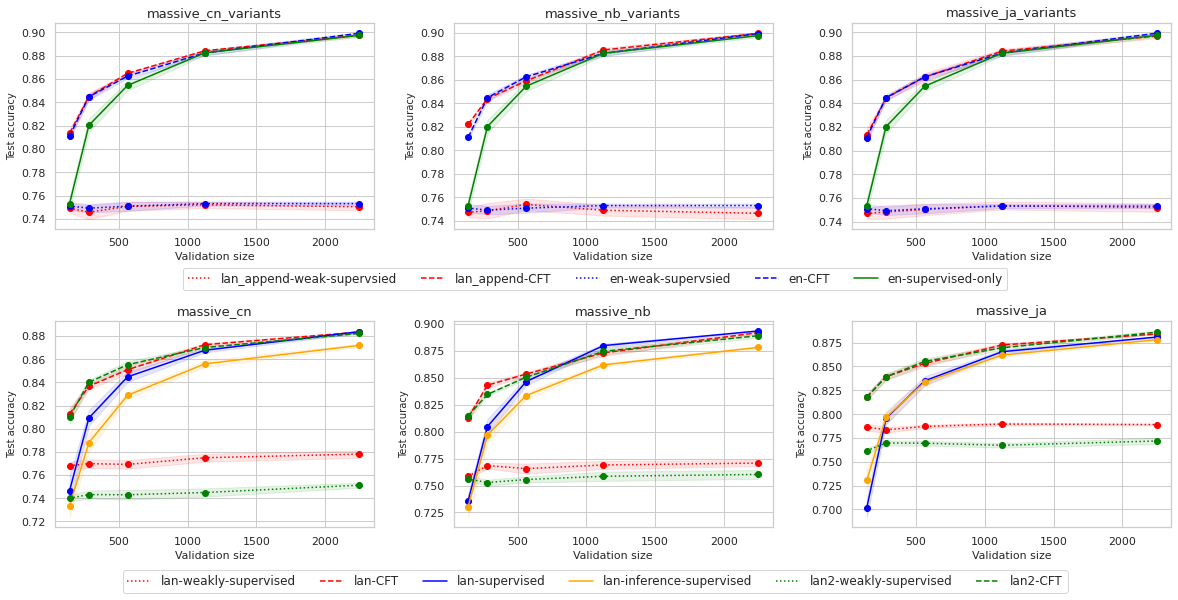

In [15]:
import matplotlib.pyplot as plt
import json
import os
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

# Dataset metadata and other configurations
dataset_metadata = { 
                     'massive_en': {"train_size": 12021, "val_size": 2250, 'metric': 'acc'},
                     'massive_cn': {"train_size": 12021, "val_size": 2250, 'metric': 'acc'},
                     'massive_cn2': {"train_size": 12021, "val_size": 2250, 'metric': 'acc'},
                     'massive_nb': {"train_size": 12021, "val_size": 2250, 'metric': 'acc'},
                     'massive_nb2': {"train_size": 12021, "val_size": 2250, 'metric': 'acc'},
                     'massive_ja2': {"train_size": 12021, "val_size": 2250, 'metric': 'acc'},
                     'massive_ja': {"train_size": 12021, "val_size": 2250, 'metric': 'acc'},
                     'massive_cn_append': {"train_size": 24042, "val_size": 2250, 'metric': 'acc'},
                     'massive_nb_append': {"train_size": 24042, "val_size": 2250, 'metric': 'acc'},
                      'massive_ja_append': {"train_size": 24042, "val_size": 2250, 'metric': 'acc'},
                     'massive_nb_inference': {"train_size": 12021, "val_size": 2250, 'metric': 'acc'},
                     'massive_cn_inference': {"train_size": 12021, "val_size": 2250, 'metric': 'acc'},
                      'massive_ja_inference': {"train_size": 12021, "val_size": 2250, 'metric': 'acc'},
                     'massive_nb_append2': {"train_size": 24042, "val_size": 2250, 'metric': 'acc'},
                     'massive_highcad': {"train_size": 11514, "val_size": 2033, 'metric': 'acc'},
                   }

result_directory = "./results"
N_RUNS = 5
PERCENT_TRIAL = 1
pip_to_style = {'val_as_train': 'solid', 'fine_tune_on_val': 'dotted', 'fine_tune_on_val_after': 'dashed'}
ledeng_name = {'val_as_train': 'supervised-only', 'fine_tune_on_val': 'weakly-supervised-only', 'fine_tune_on_val_after': '-continous-fine-tuning'}
dataset_to_color = {'massive_cn_append': 'red', 'massive_cn_inference': 'orange', 'massive_en': 'blue', 'massive_cn': 'red', 'massive_cn2': 'green', 
                    'massive_nb_append': 'red', 'massive_nb_inference': 'orange', 'massive_nb': 'red', 'massive_nb2': 'green',
                    'massive_ja_append': 'red', 'massive_ja_inference': 'orange', 'massive_ja': 'red', 'massive_ja2': 'green'}

polt_files = {
    "massive_cn_variants": [
        "results/massive_cn_append/massive_cn_append-fine_tune_on_val-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive-EN/massive_en-fine_tune_on_val-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive-EN/massive_en-val_as_train-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json"
    ],
    "massive_cn": [
        "results/massive-CN/massive_cn-fine_tune_on_val-majority_voting-bert_classifier_model_chinese_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive-CN/massive_cn-val_as_train-majority_voting-bert_classifier_model_chinese_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive_cn_inference/massive_cn_inference-val_as_train-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive-CN2/massive_cn2-fine_tune_on_val-majority_voting-bert_classifier_model_chinese_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(3).json"
    ],
    "massive_nb_variants": [
        "results/massive_nb_append/massive_nb_append-fine_tune_on_val-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive-EN/massive_en-fine_tune_on_val-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive-EN/massive_en-val_as_train-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json"
    ],
    "massive_nb": [
        "results/massive-NB/massive_nb-fine_tune_on_val-majority_voting-bert_classifier_model_nb_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive-NB2/massive_nb2-val_as_train-majority_voting-bert_classifier_model_nb_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(3).json",
        "results/massive_nb_inference/massive_nb_inference-val_as_train-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive-NB2/massive_nb2-fine_tune_on_val-majority_voting-bert_classifier_model_nb_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(3).json"
    ],
    "massive_ja_variants": [
        "results/massive_ja_append/massive_ja_append-fine_tune_on_val-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
       "results/massive-EN/massive_en-fine_tune_on_val-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive-EN/massive_en-val_as_train-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json"
    ],
    "massive_ja": [
        "results/massive-JA/massive_ja-fine_tune_on_val-majority_voting-bert_classifier_model_ja_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive-JA/massive_ja-val_as_train-majority_voting-bert_classifier_model_ja_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive_ja_inference/massive_ja_inference-val_as_train-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
        "results/massive-JA2/massive_ja2-fine_tune_on_val-majority_voting-bert_classifier_model_ja_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json"
    ]
}

plotsize = len(polt_files)
row = 2
col = 3
fig, axs = plt.subplots(row, col, figsize=(20, 10))
counter_x = 0
counter_y = 0

for name, files in polt_files.items():
    ax = axs[counter_y, counter_x]
    counter_y += 1
    if counter_y == row:
        counter_y = 0
        counter_x += 1
    
    for filepath in files:
        with open(filepath) as f:
            file = (filepath[3:]).split("/")[2].split('.')[0].split("-")
            dataset_name, pip, LM, EM = file[:4]

            result_dict = json.load(f)
            x = np.array(list(result_dict.keys())).astype(float) * dataset_metadata[dataset_name]['val_size']
            em_test = [result_dict[k]["em_test"] for k in result_dict]
            em_test_mean, em_test_std = zip(*[list(v.values())[0] for v in em_test])
            em_test_se = np.array(em_test_std) / np.sqrt(N_RUNS)

            color = dataset_to_color[dataset_name]

            if name in ['massive_cn', 'massive_nb', 'massive_ja'] and filepath in [ "results/massive-CN/massive_cn-val_as_train-majority_voting-bert_classifier_model_chinese_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json",
  "results/massive-NB2/massive_nb2-val_as_train-majority_voting-bert_classifier_model_nb_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(3).json",
 "results/massive-JA/massive_ja-val_as_train-majority_voting-bert_classifier_model_ja_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json"]:
                if pip == 'val_as_train':
                    color = 'blue'
            if name in ["massive_cn_variants", "massive_nb_variants", "massive_ja_variants"] and filepath in [
        "results/massive-EN/massive_en-val_as_train-majority_voting-bert_classifier_model_roberta_fixed-soft-unstratified-fixed_hyperparam-fixed_steps_(2).json" ]:
                if pip == 'val_as_train':
                    color = 'green'

            ax.plot(x, em_test_mean, label=dataset_name + '-' + ledeng_name[pip], color=color, linestyle=pip_to_style[pip], marker='o')
            ax.fill_between(x, em_test_mean - 1 * em_test_se, em_test_mean + 1 * np.array(em_test_se), alpha=0.1, color=color)
            
            if pip == 'fine_tune_on_val':
                pip = 'fine_tune_on_val_after'
                tuned_em_test = [result_dict[k]["tuned_em_test"] for k in result_dict]
                tuned_em_test_mean, tuned_em_test_std = zip(*[list(v.values())[0] for v in tuned_em_test])
                tuned_em_test_se = np.array(tuned_em_test_std) / np.sqrt(N_RUNS)
                
                ax.plot(x, tuned_em_test_mean, label=dataset_name + ledeng_name[pip], color=dataset_to_color[dataset_name], linestyle=pip_to_style[pip], marker='o')
                ax.fill_between(x, tuned_em_test_mean - 1 * tuned_em_test_se, tuned_em_test_mean + 1 * np.array(tuned_em_test_se), alpha=0.1, color=dataset_to_color[dataset_name])
    
    ax.set_title(name, fontsize=13)
    ax.set_xlabel("Validation size", fontsize=11)
    ax.set_ylabel("Test {}uracy".format(dataset_metadata[dataset_name]['metric']), fontsize=10)

# Create custom legends
legend_elements_row1 = [
    plt.Line2D([0], [0], color='red', linestyle='dotted',label='lan_append-weak-supervsied'),
    plt.Line2D([0], [0], color='red', linestyle='dashed', label='lan_append-CFT'),
    plt.Line2D([0], [0], color='blue', linestyle='dotted', label='en-weak-supervsied'),
    plt.Line2D([0], [0], color='blue', linestyle='dashed', label='en-CFT'),
    plt.Line2D([0], [0], color='green', linestyle='solid', label='en-supervised-only'),
]
legend_elements_row2 = [
    plt.Line2D([0], [0], color='red', linestyle='dotted',label='lan-weakly-supervised'),
    plt.Line2D([0], [0], color='red', linestyle='dashed', label='lan-CFT'),
    plt.Line2D([0], [0], color='blue', linestyle='solid', label='lan-supervised'),
    plt.Line2D([0], [0], color='orange', linestyle='solid', label='lan-inference-supervised'),
    plt.Line2D([0], [0], color='green', linestyle='dotted', label='lan2-weakly-supervised'),
    plt.Line2D([0], [0], color='green', linestyle='dashed', label='lan2-CFT'),           
]

# Add the legends to the figure
fig.legend(handles=legend_elements_row1, loc='lower center', ncol=6, bbox_to_anchor=(0.5, 0.47), fontsize=12, fancybox=True)
fig.legend(handles=legend_elements_row2, loc='lower center', ncol=6, bbox_to_anchor=(0.5, 0.05), fontsize=12, fancybox=True)

plt.subplots_adjust(bottom=0.15, top=0.85, hspace=0.45, wspace=0.25)
plt.savefig("massive_multilanguage6.pdf")
# plt.savefig('high_resolution_plot.png', dpi=600)


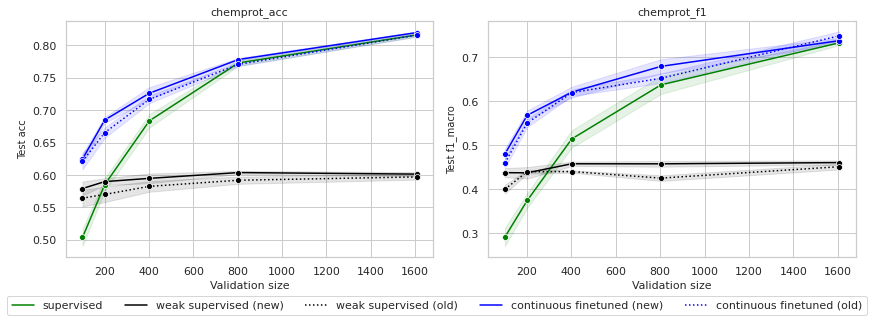

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

N_RUNS = 5 

# Dataset metadata
dataset_metadata = {
    'amazon31': {'n_class': 31, "train_size": 131781, "val_size": 5805, 'metric': 'acc'},
    'banking77': {'n_class': 77, "train_size": 9003, "val_size": 1000, 'metric': 'acc'},
    'chemprot_f1': {'n_class': 10, "train_size": 12600, "val_size": 1607, 'metric': 'f1_macro', 'coverage': 0.86},
    'chemprot_acc': {'n_class': 10, "train_size": 12861, "val_size": 1607, 'metric': 'acc', 'coverage': 0.86},
    # Add other datasets if needed
}

datapath = "./results_forgraph"
# Define the paths to your result files
files_per_data = [
    (f"{datapath}/chemprot_acc/new_val_acc.json", 'supervised', 'solid'),
    (f"{datapath}/chemprot_acc/new_fine_acc.json", 'fine_tune_on_val', 'solid'),
    (f"{datapath}/chemprot_f1/new_val_f1.json", 'supervised', 'solid'),
    (f"{datapath}/chemprot_f1/new_fine_f1.json", 'fine_tune_on_val', 'solid'),
    (f"{datapath}/chemprot_acc/old_fine_acc.json", 'fine_tune_on_val', 'dotted'),
    (f"{datapath}/chemprot_f1/old_fine_f1.json", 'fine_tune_on_val', 'dotted'),
    # Add other datasets if needed
]

# Plot settings
sns.set(style="whitegrid")
pip_to_color = {'supervised': 'green', 'weak supervised': 'black', 'continuous finetuned': 'blue'}
fig, axs = plt.subplots(1, 2, figsize=(12, 4.3))

# To store data for combined plotting
plot_data = {}

# Process each dataset and store plot data
for filepath, pip, linestyle in files_per_data:
    with open(filepath) as f:
        dataset_name = filepath.split("/")[2]

        result_dict = json.load(f)
        x = result_dict.keys()
        if len(x) <= 1:
            continue
        if pip in ['fine_tune_on_val', 'supervised']:
            if dataset_metadata[dataset_name]['metric'] not in result_dict[list(x)[0]]["em_test"].keys():
                continue
            x = np.array(list(x)).astype(float) * dataset_metadata[dataset_name]['val_size']
            em_test = [result_dict[k]["em_test"] for k in result_dict]
            em_test_mean, em_test_std = zip(*[list(v.values())[0] for v in em_test])
            em_test_se = np.array(em_test_std) / np.sqrt(N_RUNS)
            
            # Store plot data
            if dataset_name not in plot_data:
                plot_data[dataset_name] = {'x': x, 'data': []}
            plot_data[dataset_name]['data'].append((pip, em_test_mean, em_test_se, result_dict, linestyle))

# Plot combined data
counter_x = 0
for dataset_name, values in plot_data.items():
    ax = axs[counter_x]
    for pip, em_test_mean, em_test_se, result_dict, linestyle in values['data']:
        pip_label = pip
        if pip == 'fine_tune_on_val':
            pip_label = 'weak supervised'
        sns.lineplot(x=values['x'], y=em_test_mean, ax=ax, label=None, color=pip_to_color[pip_label], linestyle=linestyle, marker='o')
        ax.fill_between(values['x'], np.array(em_test_mean) - 1 * em_test_se, np.array(em_test_mean) + 1 * em_test_se, alpha=0.1, color=pip_to_color[pip_label])

        if pip == 'fine_tune_on_val':
            l = 'continuous finetuned'
            tuned_em_test = [result_dict[k]["tuned_em_test"] for k in result_dict]
            tuned_em_test_mean, tuned_em_test_std = zip(*[list(v.values())[0] for v in tuned_em_test])
            tuned_em_test_se = np.array(tuned_em_test_std) / np.sqrt(N_RUNS)
            sns.lineplot(x=values['x'], y=tuned_em_test_mean, ax=ax, label=None, color=pip_to_color[l], linestyle=linestyle, marker='o')
            ax.fill_between(values['x'], np.array(tuned_em_test_mean) - 1 * tuned_em_test_se, np.array(tuned_em_test_mean) + 1 * tuned_em_test_se, alpha=0.1, color=pip_to_color[l])

    ax.set_title(f"{dataset_name}", fontsize=11)
    ax.set_xlabel("Validation size", fontsize=11)
    ax.set_ylabel(f"Test {dataset_metadata[dataset_name]['metric']}", fontsize=10)
    
    counter_x += 1
    if counter_x == 2:
        break

# Adjust layout and show plot
plt.tight_layout()

# Create custom legends
legend_elements = [
    plt.Line2D([0], [0], color='green', linestyle='solid', label='supervised'),
    plt.Line2D([0], [0], color='black', linestyle='solid', label='weak supervised (new)'),
    plt.Line2D([0], [0], color='black', linestyle='dotted', label='weak supervised (old)'),
    plt.Line2D([0], [0], color='blue', linestyle='solid', label='continuous finetuned (new)'),
    plt.Line2D([0], [0], color='blue', linestyle='dotted', label='continuous finetuned (old)'),
]

# Add the legends to the figure
fig.legend(handles=legend_elements, loc='lower center', ncol=5, bbox_to_anchor=(0.5, -0.055), fontsize=11, fancybox=True)

plt.savefig('chemprot_acc.pdf', bbox_inches='tight')
plt.show()


# others:

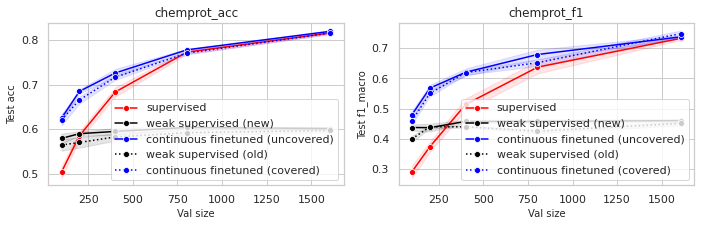

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np

N_RUNS = 5 

# Dataset metadata
dataset_metadata = {
    'amazon31': {'n_class': 31, "train_size": 131781, "val_size": 5805, 'metric': 'acc'},
    'banking77': {'n_class': 77, "train_size": 9003, "val_size": 1000, 'metric': 'acc'},
    'chemprot_f1': {'n_class': 10, "train_size": 12600, "val_size": 1607, 'metric': 'f1_macro', 'coverage': 0.86},
    'chemprot_acc': {'n_class': 10, "train_size": 12861, "val_size": 1607, 'metric': 'acc', 'coverage': 0.86},
    # Add other datasets if needed
}

datapath = "./results_forgraph"
# Define the paths to your result files
files_per_data = [
    (f"{datapath}/chemprot_acc/new_val_acc.json", 'supervised', 'solid'),
    (f"{datapath}/chemprot_acc/new_fine_acc.json", 'fine_tune_on_val', 'solid'),
    (f"{datapath}/chemprot_f1/new_val_f1.json", 'supervised', 'solid'),
    (f"{datapath}/chemprot_f1/new_fine_f1.json", 'fine_tune_on_val', 'solid'),
    (f"{datapath}/chemprot_acc/old_fine_acc.json", 'fine_tune_on_val', 'dotted'),
    (f"{datapath}/chemprot_f1/old_fine_f1.json", 'fine_tune_on_val', 'dotted'),
    # Add other datasets if needed
]

# Plot settings
sns.set(style="whitegrid")
pip_to_color = {'supervised': 'red', 'weak supervised': 'black', 'continuous finetuned': 'blue'}
fig, axs = plt.subplots(1, 2, figsize=(10,3.3))

# To store data for combined plotting
plot_data = {}

# Process each dataset and store plot data
for filepath, pip, linestyle in files_per_data:
    with open(filepath) as f:
        dataset_name = filepath.split("/")[2]

        result_dict = json.load(f)
        x = result_dict.keys()
        if len(x) <= 1:
            continue
        if pip in ['fine_tune_on_val', 'supervised']:
            if dataset_metadata[dataset_name]['metric'] not in result_dict[list(x)[0]]["em_test"].keys():
                continue
            x = np.array(list(x)).astype(float) * dataset_metadata[dataset_name]['val_size']
            em_test = [result_dict[k]["em_test"] for k in result_dict]
            em_test_mean, em_test_std = zip(*[list(v.values())[0] for v in em_test])
            em_test_se = np.array(em_test_std) / np.sqrt(N_RUNS)
            
            # Store plot data
            if dataset_name not in plot_data:
                plot_data[dataset_name] = {'x': x, 'data': []}
            plot_data[dataset_name]['data'].append((pip, em_test_mean, em_test_se, result_dict, linestyle))

# Plot combined data
counter_x = 0
for dataset_name, values in plot_data.items():
    ax = axs[counter_x]
    for pip, em_test_mean, em_test_se, result_dict, linestyle in values['data']:
        pip_label = pip
        if pip == 'fine_tune_on_val':
            pip_label = 'weak supervised'
        sns.lineplot(x=values['x'], y=em_test_mean, ax=ax, label=f"{pip_label} ({'old' if linestyle == 'dotted' else 'new'})" if pip != 'supervised' else pip_label, 
                     color=pip_to_color[pip_label], linestyle=linestyle, marker='o')
        ax.fill_between(values['x'], np.array(em_test_mean) - 1 * em_test_se, np.array(em_test_mean) + 1 * em_test_se, 
                        alpha=0.1, color=pip_to_color[pip_label])

        if pip == 'fine_tune_on_val':
            l = 'continuous finetuned'
            tuned_em_test = [result_dict[k]["tuned_em_test"] for k in result_dict]
            tuned_em_test_mean, tuned_em_test_std = zip(*[list(v.values())[0] for v in tuned_em_test])
            tuned_em_test_se = np.array(tuned_em_test_std) / np.sqrt(N_RUNS)
            sns.lineplot(x=values['x'], y=tuned_em_test_mean, ax=ax, label=f"{l} ({'covered' if linestyle == 'dotted' else 'uncovered'})", 
                         color=pip_to_color[l], linestyle=linestyle, marker='o')
            ax.fill_between(values['x'], np.array(tuned_em_test_mean) - 1 * tuned_em_test_se, 
                            np.array(tuned_em_test_mean) + 1 * tuned_em_test_se, alpha=0.1, color=pip_to_color[l])

    ax.set_title(f"{dataset_name}", fontsize=12)
    ax.set_xlabel("Validation size", fontsize=10)
    ax.set_ylabel(f"Test {dataset_metadata[dataset_name]['metric']}", fontsize=10)
    
    ax.legend(loc='lower right')  # Move legend inside the plot area for each plot

    counter_x += 1
    if counter_x == 2:
        break

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('chemprot_acc.pdf')
plt.show()